# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1. Посчитайте кол-во уникальных жанров. (1 балл)
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`. (1 балл)
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`. (1 балл)
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`. (1 балл)
5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`? (1 балл)
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий. (1 балл)
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`. (1 балл)
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)



In [1]:
import numpy as np
import pandas as pd

# Не обязательно, можно использовать любую удобную вам библиотеку для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  2223k      0 --:--:-- --:--:-- --:--:-- 2225k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [3]:
df = pd.read_csv('anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
seed = 0
np.random.seed(seed)

## 1. Посчитайте кол-во уникальных жанров. (1 балл)

In [6]:
print(f"Number unique genre: {df['genre'].str.split(',').explode().nunique()}")

Number unique genre: 75


## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type. (1 балл)

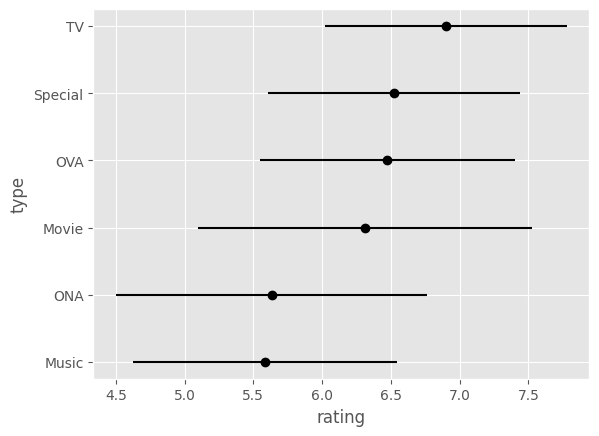

In [7]:
def plot_mean_std(df: pd.DataFrame) -> None:
    for i, row in enumerate(df.itertuples()):
        plt.errorbar(
            x=row.mean,
            y=i,
            xerr=row.std,
            c='black',
            fmt='o--'
        )
    plt.yticks(range(len(df)), df.index)
    plt.ylabel(df.index.name)
    plt.xlabel("rating")


plot_mean_std(
    df.groupby('type')['rating'].agg(['mean', 'std']).sort_values("mean")
)

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам. (1 балл)
График постройте для топ-15 жанров по рейтингу

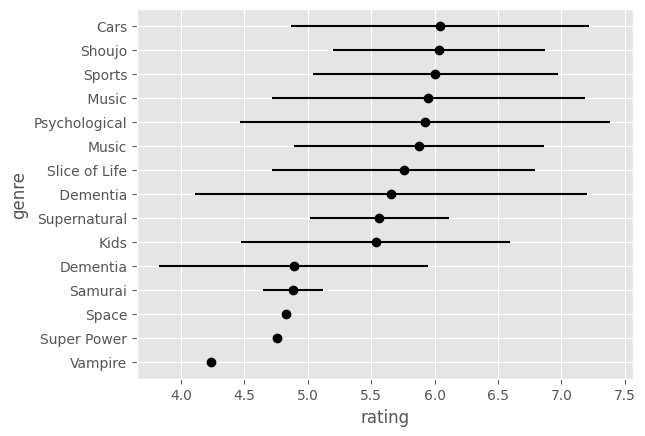

In [8]:
head_size = 15

flatten = df['genre'].str.split(',').explode()
flatten = pd.concat([df["rating"].loc[flatten.index], flatten], axis=1)
flatten.dropna(inplace=True)

top_rating = flatten.groupby("genre").agg(['mean', 'std'])["rating"].sort_values("mean").head(head_size)

plot_mean_std(top_rating)

## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type. (1 балл)

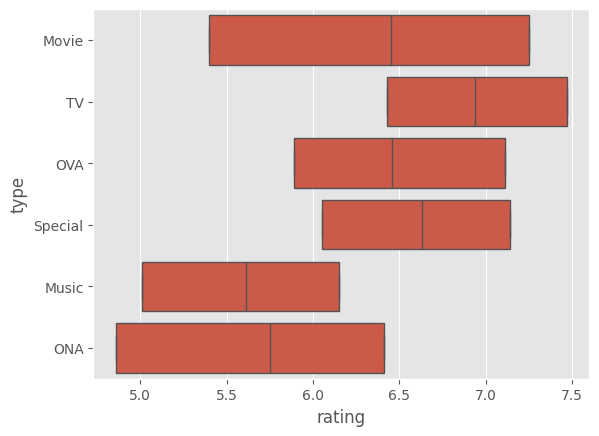

In [9]:
plot = sns.boxplot(
    x=df["rating"],
    y=df["type"],
    whis=[25, 75],
    showfliers=False,
    )

# На всякий оставлю еще выражение чтоб явно это посчитать 
# df.dropna(axis=0).fillna(0).groupby('type')['rating'].agg([
#     lambda x: np.quantile(x, 0.25),
#     lambda x: np.quantile(x, 0.5),
#     lambda x: np.quantile(x, 0.75),
# ]).sort_values("<lambda_1>")

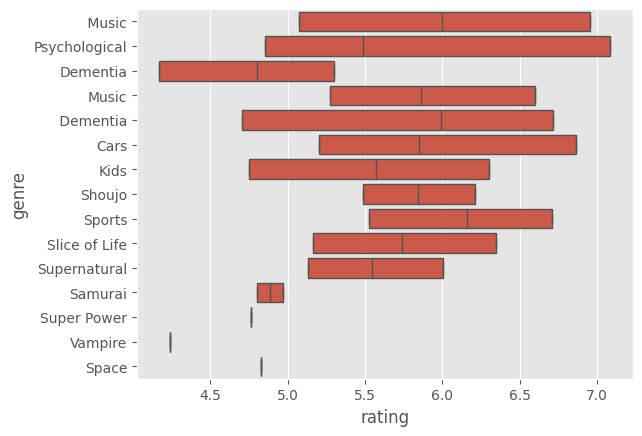

In [10]:
top_genre_data = flatten[flatten["genre"].isin(top_rating.index)]
top_genre_data.set_index([pd.Index(range(len(top_genre_data)))], inplace=True)

plot = sns.boxplot(
    x=top_genre_data["rating"],
    y=top_genre_data["genre"],
    whis=[25, 75],
    showfliers=False,
    )

## 5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)

In [11]:
cnt_per_genre = df["genre"].str.split(",").apply(lambda x: len(x) if isinstance(x, list) else 0).value_counts()

cnt_less_3 = cnt_per_genre.loc[[1, 2]].sum()
cnt_total = cnt_per_genre.sum()

print(f"Percent of anime with 1 or 2 genre: {cnt_less_3 / cnt_total *100:.1f} % ({cnt_less_3} in absolute)")

Percent of anime with 1 or 2 genre: 42.3 % (4436 in absolute)


## 6. Сколько в среднем эпизодов приходится на аниме типа == TV? (1 балл)

In [12]:
mean_eps = df[df["type"] == "TV"]["episodes"]\
    .replace("Unknown", np.nan)\
    .astype(float)\
    .mean(skipna=True)

print(f"Mean episodes for TV anime: {int(mean_eps)}")

Mean episodes for TV anime: 37


## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий. (1 балл)
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


In [13]:
pd.options.mode.copy_on_write = True

numerical_data = df[["episodes", "rating", "members"]]
numerical_data.replace(
    {"Unknown": -1},
    inplace=True
)
numerical_data.dropna(inplace=True)

def get_anomaly(col: pd.Series) -> pd.Series:
    mean = col.mean() 
    std = col.std()
    return pd.concat([col[col < mean - 3*std], col[col > mean + 3*std]])

episodes_anomaly = get_anomaly(numerical_data["episodes"].astype(np.float32))
rating_anomaly = get_anomaly(numerical_data["rating"].astype(np.float32))
members_anomaly = get_anomaly(numerical_data["members"].astype(np.float32))

for (name, series) in zip(("episodes", "rating", "members"), (episodes_anomaly, rating_anomaly, members_anomaly)):
    print(f"Anomaly count for {name} is\t{len(series)}")

anomaly = set()
anomaly.update(episodes_anomaly.index, rating_anomaly.index, members_anomaly.index)

print(f"Total anomaly count is {len(anomaly)}")

Anomaly count for episodes is	63
Anomaly count for rating is	41
Anomaly count for members is	213
Total anomaly count is 309


## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)

In [14]:
flatten_by_genre = df['genre'].str.split(',').explode()
flatten_by_genre = pd.concat([df[["episodes", "members"]].loc[flatten.index], flatten], axis=1)
flatten_by_genre.replace(
    {"Unknown": -1},
    inplace=True
)
flatten_by_genre.dropna(inplace=True)

flatten_by_genre["episodes"] = flatten_by_genre["episodes"].astype(int)


means = flatten_by_genre[["genre", "rating", "episodes", "members"]].groupby("genre").agg(["mean"])
corr = means.corr()

Correlation(mean_genre(rating), mean_genre(episodes)) = 0.46878152147173197


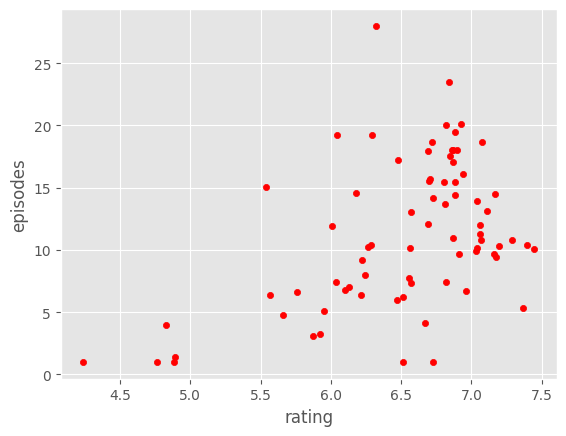

In [15]:
print(f"Correlation(mean_genre(rating), mean_genre(episodes)) = {corr.loc['rating', 'episodes']['mean']['mean']}")
plot = means.plot.scatter(x="rating", y="episodes", c='r')

Correlation(mean_genre(rating), mean_genre(members)) = 0.6404882014118735


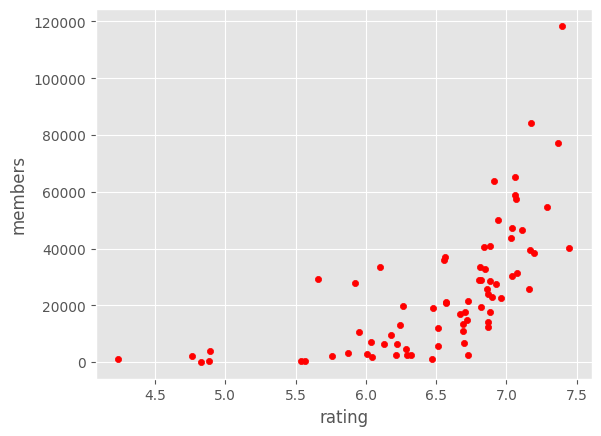

In [16]:
print(f"Correlation(mean_genre(rating), mean_genre(members)) = {corr.loc['rating', 'members']['mean']['mean']}")
plot = means.plot.scatter(x="rating", y="members", c='r')

## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type. (1 балл)

In [17]:
def plot_corr_per_type(type_name: str) -> None:
    curr_type = df[df["type"] == type_name][["genre", "rating", "members"]]
    curr_type.replace(
        {"Unknown": -1},
        inplace=True
    )
    curr_type.dropna(inplace=True)
    curr_type["genre_cnt"] = curr_type["genre"].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)
    curr_type["members"] = curr_type["members"].astype(int)
    corr = curr_type[["genre_cnt", "rating", "members"]].corr()
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))
    sns.scatterplot(
        data=curr_type,
        x="genre_cnt",
        y="rating",
        ax=ax1
    )
    ax1.set_title(f"corr={corr.loc['genre_cnt', 'rating']:.4f}")
    sns.scatterplot(
        data=curr_type,
        x="genre_cnt",
        y="members",
        ax=ax2
    )
    ax2.set_title(f"corr={corr.loc['genre_cnt', 'members']:.4f}")
    fig.suptitle(type_name)


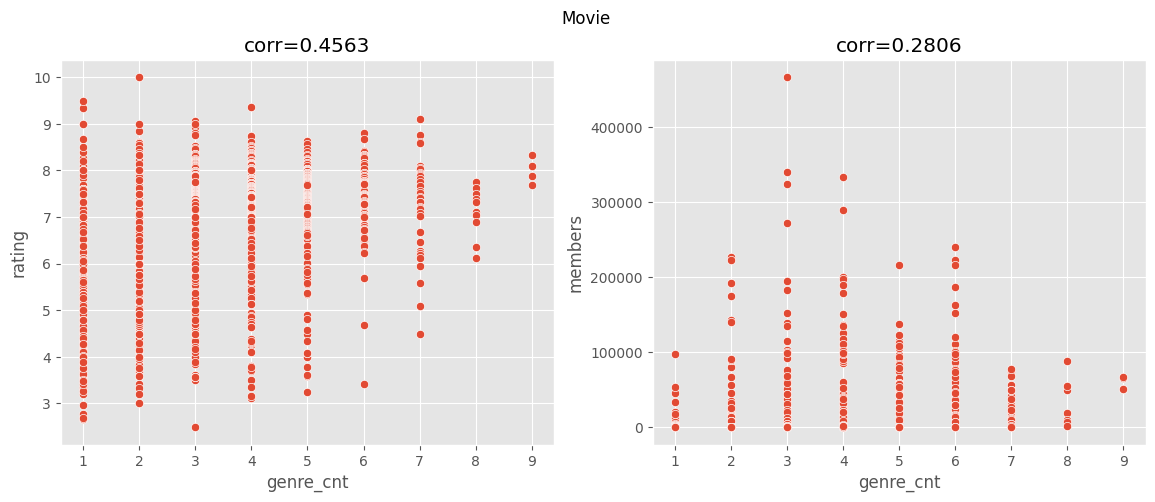

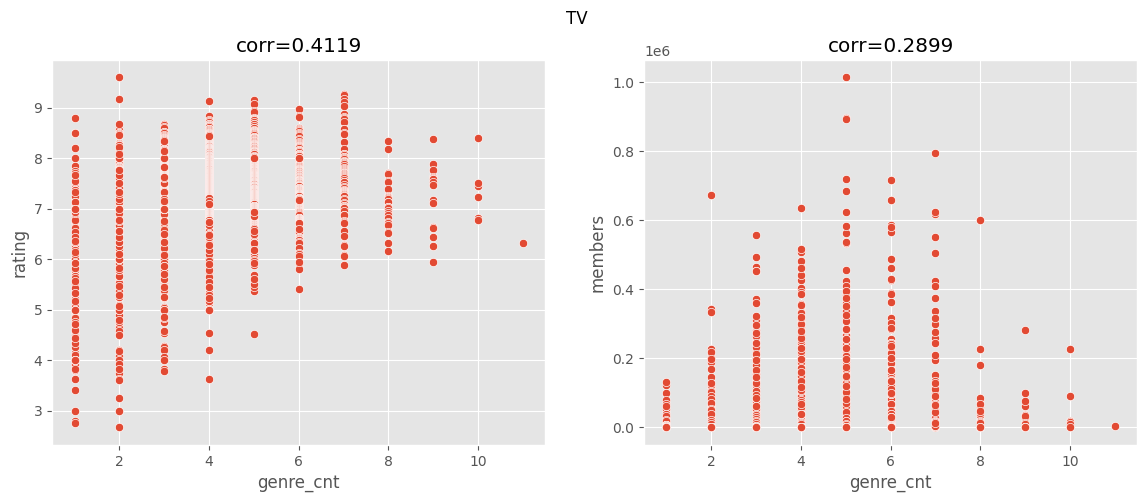

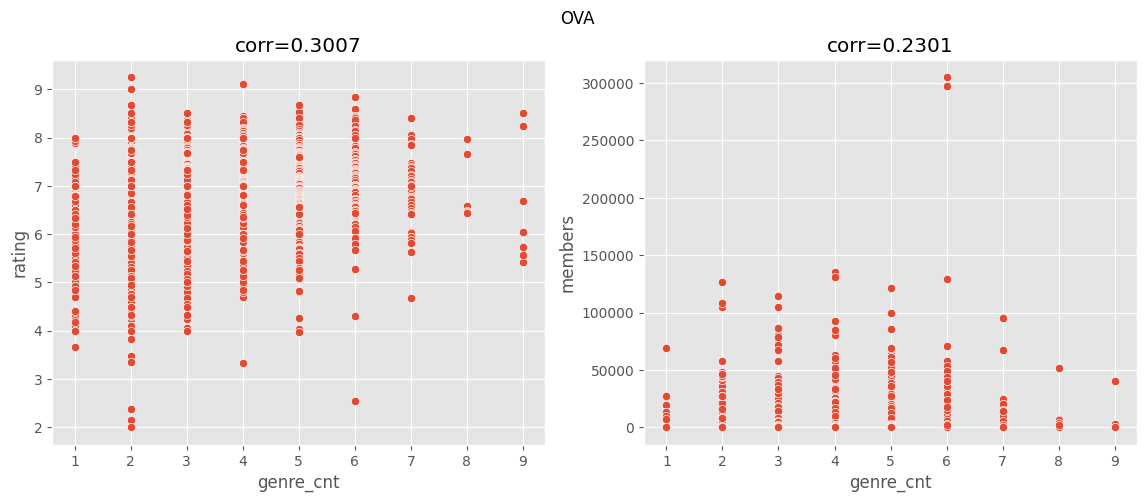

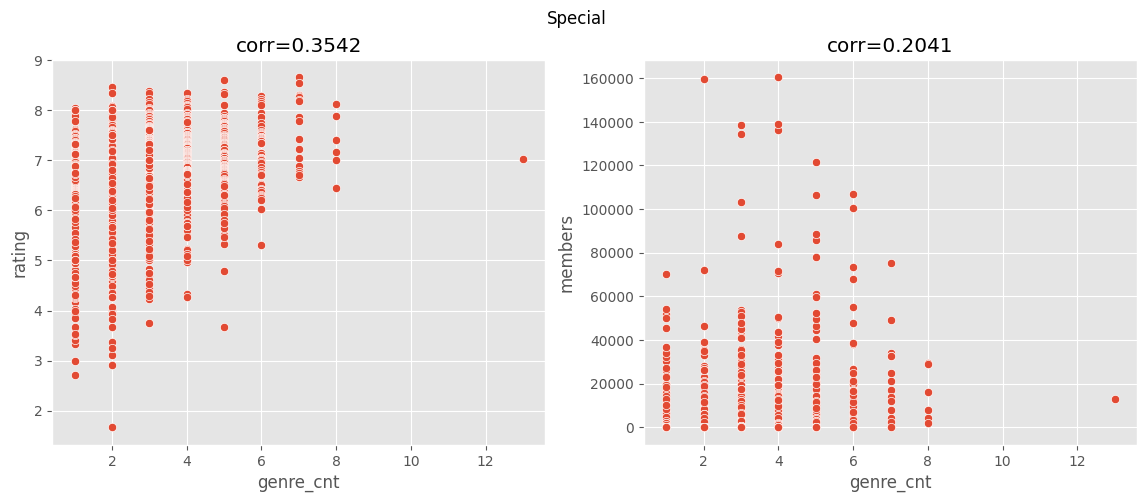

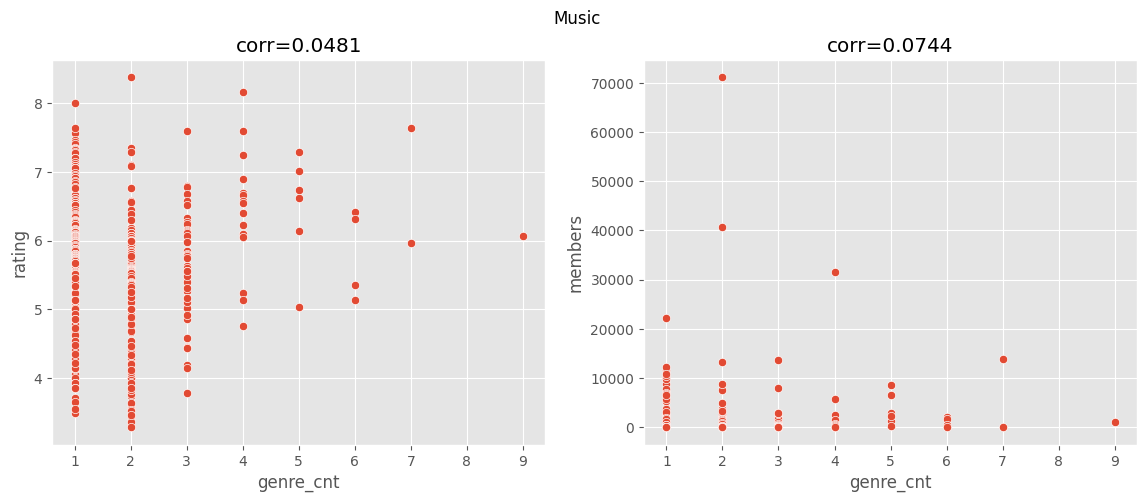

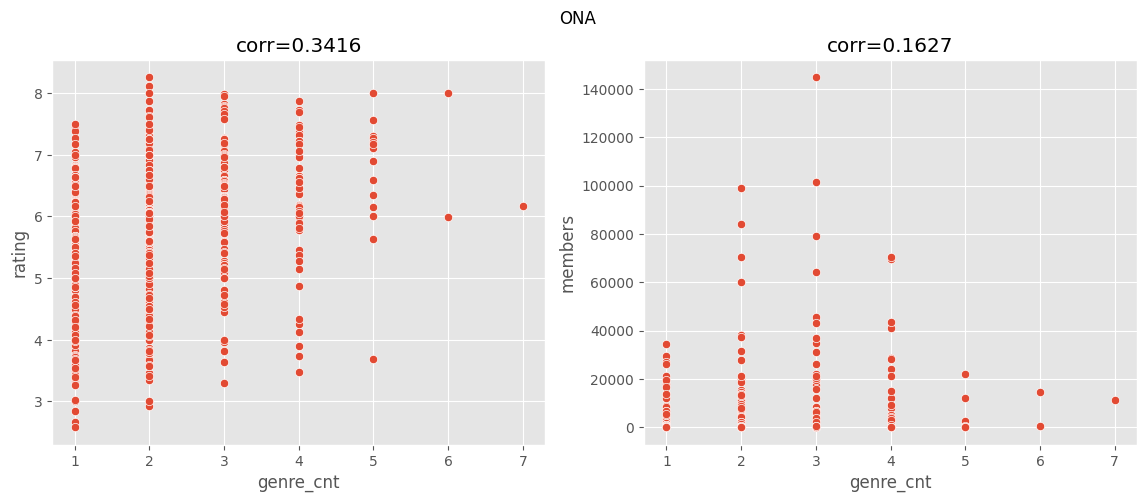

In [18]:
for type_name in df["type"].dropna().unique():
    plot_corr_per_type(type_name)

## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)

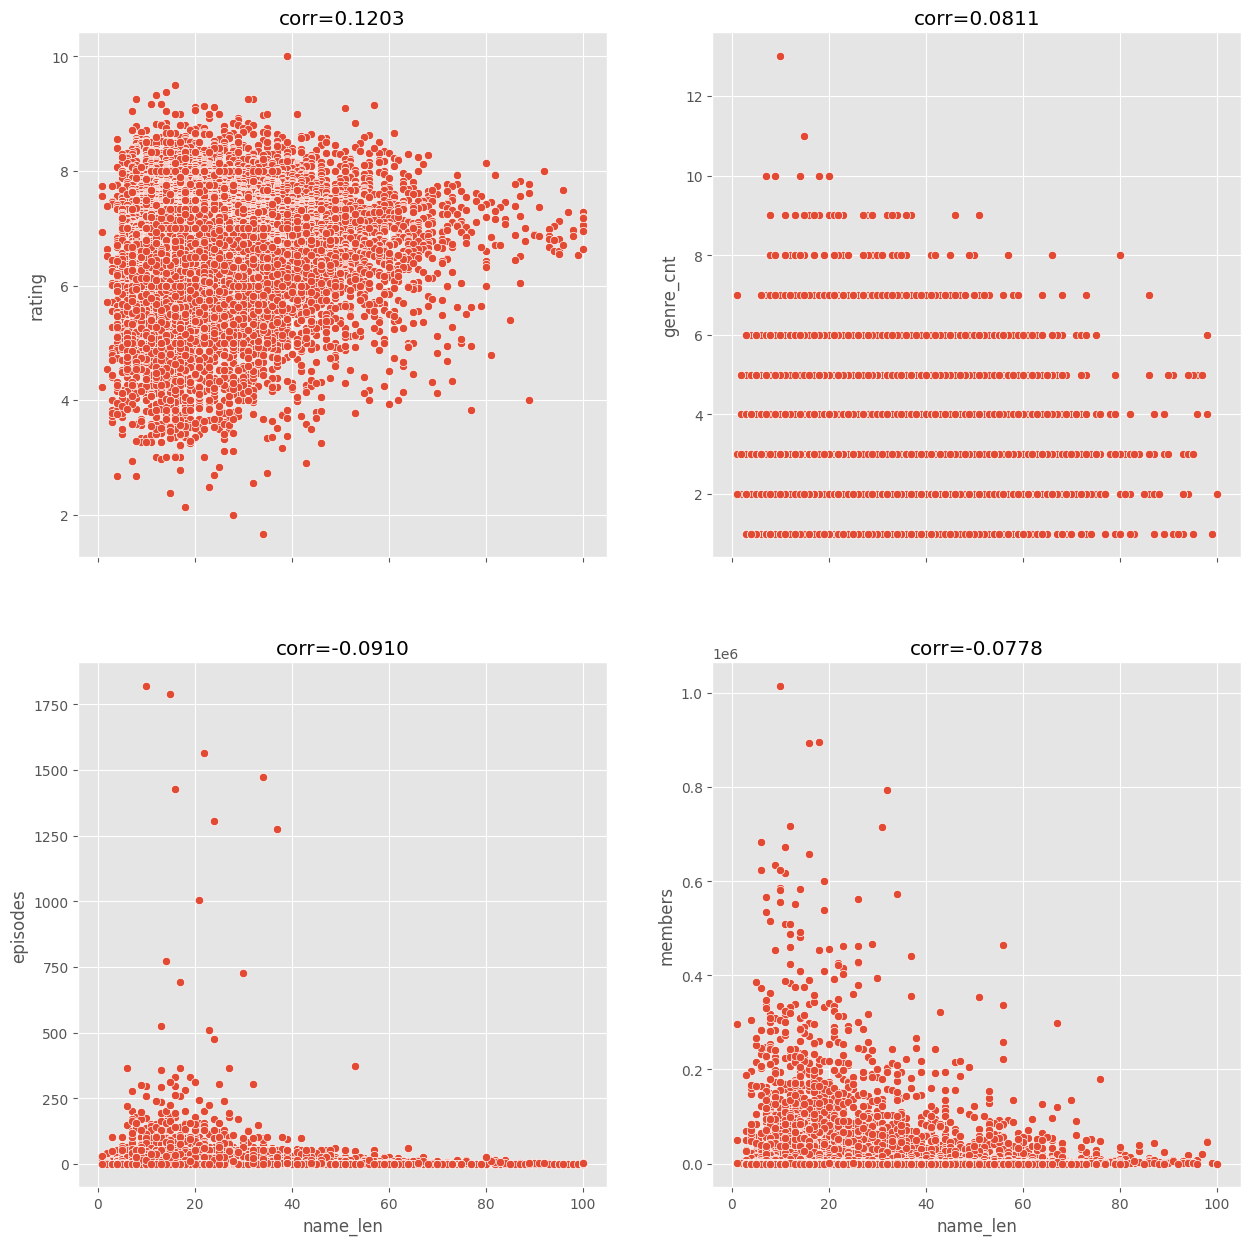

In [19]:
curr_df = df
curr_df.replace(
    {"Unknown": np.nan},
    inplace=True
)
curr_df.dropna(inplace=True)
curr_df["members"] = curr_df["members"].astype(int)

features = curr_df[["rating", "members", "episodes"]]
features["episodes"] = features["episodes"].astype(int)
features["name_len"] = curr_df["name"].apply(len)
features["genre_cnt"] = curr_df["genre"].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)
corr = features.corr()

def plot_corr(ax, feature):
    sns.scatterplot(
        data=features,
        x="name_len",
        y=feature,
        ax=ax
    )
    ax.set_title(f"corr={corr.loc['name_len', feature]:.4f}")


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15), sharex=True)

plot_corr(axes[0][0], "rating")
plot_corr(axes[0][1], "genre_cnt")
plot_corr(axes[1][0], "episodes")
plot_corr(axes[1][1], "members")

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

 ### Задание 11: Нормальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5.
Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \
Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

In [20]:
mu = 5
sigma = 1.5
data = np.random.normal(mu, sigma, 1000)

In [21]:
from numpy.typing import NDArray

def get_mode(data: NDArray) -> float:
    cnt, bins = np.histogram(data, bins=int(np.sqrt(len(data))))
    idx = np.argmax(cnt)
    return (bins[idx] + bins[idx+1]) / 2

In [22]:
mean = np.mean(data)
median = np.median(data)
mode = get_mode(data)

std = np.std(data)

print(f'Выборочное среднее: {mean}')
print(f'Выборочная медиана: {median}')
print(f'Выборочная мода: {mode}')
print(f'Стандартное отклонение: {std}')

Выборочное среднее: 4.932114938764707
Выборочная медиана: 4.9129579478005585
Выборочная мода: 4.503997842699071
Стандартное отклонение: 1.4805497380035386


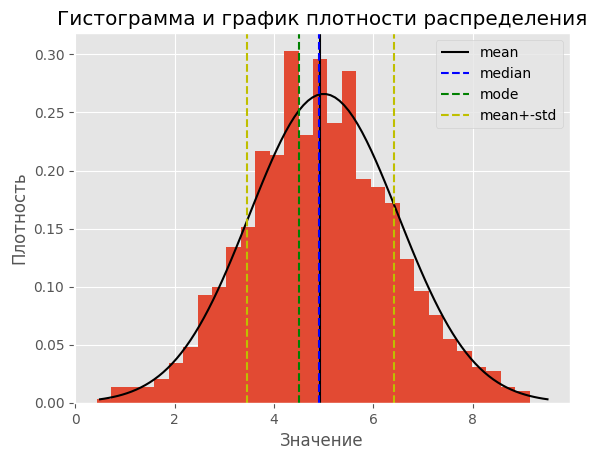

In [23]:
plt.hist(data, bins=30, density=True)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = np.exp(-((x - mu) / sigma) ** 2 / 2) / (sigma * np.sqrt(2 * np.pi))
plt.plot(x, y, 'black')

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(median, __ymin, __ymax, colors='b', linestyles='--', label='median')
plt.vlines(mode, __ymin, __ymax, colors='g', linestyles='--', label='mode')

plt.vlines(mean + std, __ymin, __ymax, colors='y', linestyles='--', label='mean+-std')
plt.vlines(mean - std, __ymin, __ymax, colors='y', linestyles='--')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.show()

In [24]:
freq = np.sum(np.abs(data - mean) > std) / len(data)

theoretical_freq = 2 * (1 - np.exp(-1 / 2))

print(f'Частота значений, которые отклоняются от среднего на более чем одно стандартное отклонение: {freq}')
print(f'Теоретическая частота: {theoretical_freq}')

Частота значений, которые отклоняются от среднего на более чем одно стандартное отклонение: 0.312
Теоретическая частота: 0.7869386805747332


### Задание 12: Экспоненциальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \

In [25]:
from scipy.stats import expon
data = expon.rvs(scale=1/0.5, size=1000)

In [26]:
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print(f'Выборочное среднее: {mean}')
print(f'Выборочная медиана: {median}')
print(f'Стандартное отклонение: {std}')

Выборочное среднее: 2.0941967378033257
Выборочная медиана: 1.5023940429813172
Стандартное отклонение: 2.044578684905254


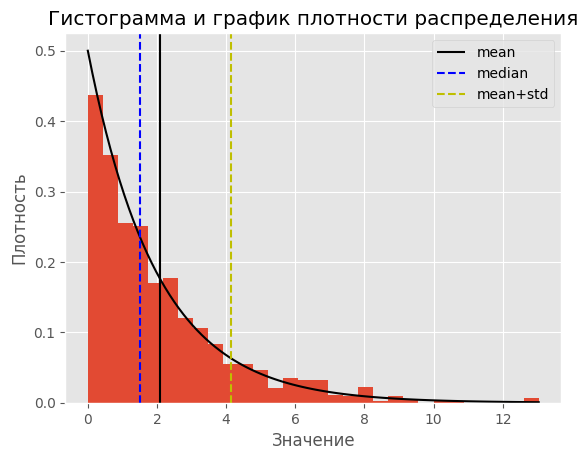

In [27]:
plt.hist(data, bins=30, density=True)

x = np.linspace(min(data), max(data), 100)
y = expon.pdf(x, scale=1/0.5)
plt.plot(x, y, 'black')

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(median, __ymin, __ymax, colors='b', linestyles='--', label='median')

plt.vlines(mean + std, __ymin, __ymax, colors='y', linestyles='--', label='mean+std')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()

In [28]:
freq = np.sum(data > 2 * mean) / len(data)
theoretical_freq = expon.cdf(2 * mean, scale=1/0.5)

print(f'Доля значений, которые больше двух выборочных средних: {freq}')
print(f'Теоретическая доля: {theoretical_freq}')

Доля значений, которые больше двух выборочных средних: 0.137
Теоретическая доля: 0.8768308589568201



### Задание 13: Биномиальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

In [29]:
from scipy.stats import binom
data = binom.rvs(n=10, p=0.7, size=1000)

In [30]:
mean = int(np.mean(data))
variance = np.var(data)

mode = np.bincount(data).argmax()

print(f'Выборочное среднее: {mean}')
print(f'Дисперсия: {variance}')
print(f'Мода: {mode}')

Выборочное среднее: 6
Дисперсия: 2.1573239999999996
Мода: 7


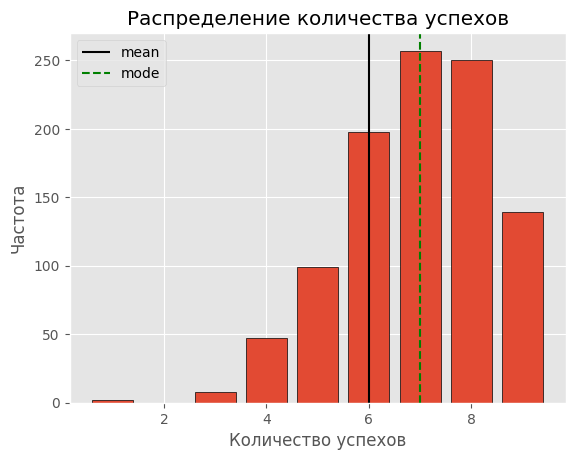

In [31]:
plt.hist(data, bins=list(range(1, 11)), edgecolor='black', align='left', rwidth=0.8)

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(mode, __ymin, __ymax, colors='g', linestyles='--', label='mode')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.xlabel('Количество успехов')
plt.ylabel('Частота')
plt.title('Распределение количества успехов')
plt.show()

In [32]:
empirical_prob = np.mean(data > 8)

theoretical_prob = binom.sf(8, n=10, p=0.7)

print(f'Эмпирическая вероятность: {empirical_prob}')
print(f'Теоретическая вероятность: {theoretical_prob}')

Эмпирическая вероятность: 0.139
Теоретическая вероятность: 0.14930834589999994


### Задание 14: Геометрическое распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

In [33]:
from scipy.stats import geom

data = geom.rvs(p=0.3, size=1000)
max(data), min(data)

(np.int64(27), np.int64(1))

In [34]:
mean = int(np.mean(data))

median = np.median(data)

mode = np.bincount(data).argmax()

print(f'Выборочное среднее: {mean}')
print(f'Медиана: {median}')
print(f'Мода: {mode}')

Выборочное среднее: 3
Медиана: 2.0
Мода: 1


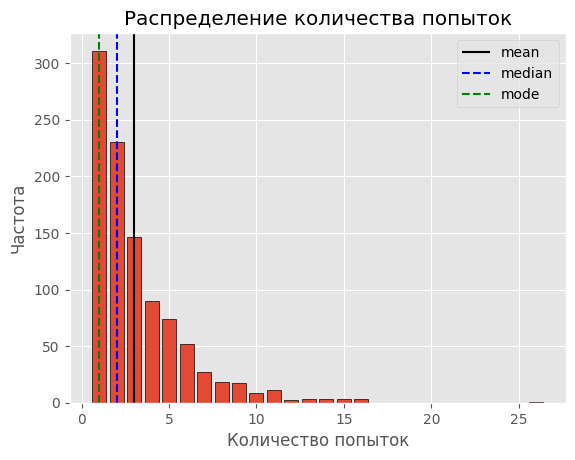

In [35]:
plt.hist(data, bins=list(range(1, max(data)+1)), edgecolor='black', align='left', rwidth=0.8)

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(median, __ymin, __ymax, colors='b', linestyles='--', label='median')
plt.vlines(mode, __ymin, __ymax, colors='g', linestyles='--', label='mode')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.xlabel('Количество попыток')
plt.ylabel('Частота')
plt.title('Распределение количества попыток')
plt.show()

In [36]:
empirical_prob = np.mean(data <= 5)

theoretical_prob = geom.cdf(5, p=0.3)

print(f'Эмпирическая вероятность: {empirical_prob}')
print(f'Теоретическая вероятность: {theoretical_prob}')

Эмпирическая вероятность: 0.851
Теоретическая вероятность: 0.83193


### Задание 15: Равномерное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

In [37]:
from scipy.stats import uniform
data = uniform.rvs(loc=3, scale=4, size=1000)

In [38]:
mean = np.mean(data)

median = np.median(data)

std = np.std(data)

print(f'Выборочное среднее: {mean}')
print(f'Медиана: {median}')
print(f'Стандартное отклонение: {std}')

Выборочное среднее: 4.936852183130091
Медиана: 4.942375978514485
Стандартное отклонение: 1.1319171594046524


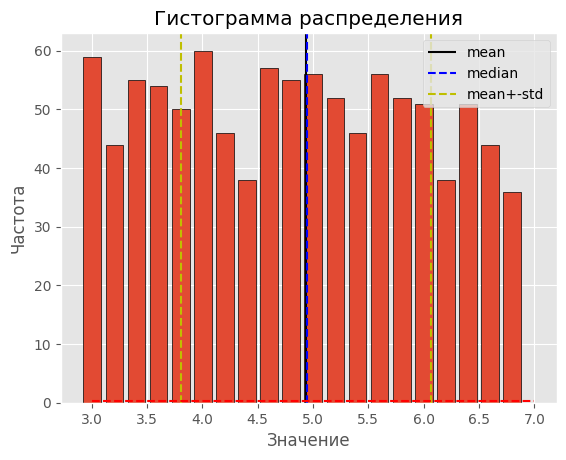

In [39]:
plt.hist(data, bins=20, edgecolor='black', align='left', rwidth=0.8)

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(median, __ymin, __ymax, colors='b', linestyles='--', label='median')

plt.vlines(mean + std, __ymin, __ymax, colors='y', linestyles='--', label='mean+-std')
plt.vlines(mean - std, __ymin, __ymax, colors='y', linestyles='--')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма распределения')

x = np.linspace(3, 7, 100)
y = uniform.pdf(x, loc=3, scale=4)
plt.plot(x, y, 'r--')
plt.show()

In [40]:
theoretical_mean = 5
theoretical_median = 5

theoretical_std = 4 / np.sqrt(12)

print(f'Теоретическое среднее: {theoretical_mean}')
print(f'Теоретическая медиана: {theoretical_median}')
print(f'Теоретическое стандартное отклонение: {theoretical_std}')

Теоретическое среднее: 5
Теоретическая медиана: 5
Теоретическое стандартное отклонение: 1.1547005383792517


### Задание 16: Распределение Пуассона (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

In [41]:
from scipy.stats import poisson
data = poisson.rvs(mu=4, size=1000)

In [42]:
mean = np.mean(data)

variance = np.var(data)

mode = np.bincount(data).argmax()

print(f'Выборочное среднее: {mean}')
print(f'Дисперсия: {variance}')
print(f'Мода: {mode}')

Выборочное среднее: 3.907
Дисперсия: 3.9403509999999997
Мода: 4


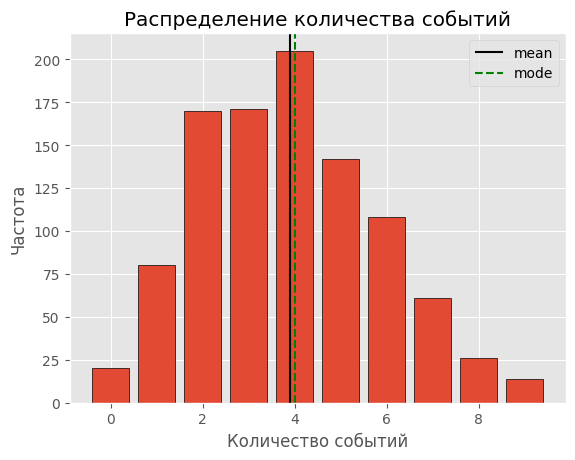

In [43]:
plt.hist(data, bins=list(range(max(data))), edgecolor='black', align='left', rwidth=0.8)

__ymin, __ymax = plt.gcf().get_axes()[0].get_ylim()

plt.vlines(mean, __ymin, __ymax, colors='black', linestyles='-', label='mean')
plt.vlines(mode, __ymin, __ymax, colors='g', linestyles='--', label='mode')

plt.legend()
plt.ylim(__ymin, __ymax)

plt.xlabel('Количество событий')
plt.ylabel('Частота')
plt.title('Распределение количества событий')
plt.show()

In [44]:
empirical_prob = np.mean(data < 3)

theoretical_prob = poisson.cdf(3, mu=4)

print(f'Эмпирическая вероятность: {empirical_prob}')
print(f'Теоретическая вероятность: {theoretical_prob}')

Эмпирическая вероятность: 0.27
Теоретическая вероятность: 0.43347012036670896


# 3 Часть

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов (3 балла все задание)
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

In [45]:
from typing import Callable, List
from numpy.typing import NDArray

statistic_callable = Callable[[NDArray], np.float32]
    
def validate_statistic(
        data: NDArray,
        statistic: statistic_callable,
        n_samples: int = 1000,
        sample_size: int = 100,
        verbose: bool = False,
        rtol: float = 1e-2
) -> np.float32:
    stat_val = statistic(data)
    sample_stats = np.array([statistic(np.random.choice(data, size=sample_size, replace=False)) for _ in range(n_samples)])
    mean_stat_val = np.mean(sample_stats)
    if verbose:
        print(f"{statistic.__name__}(data) = {stat_val}")

        bins = plt.hist(
            sample_stats,
            bins=int(np.sqrt(n_samples)),
        )
        __ymax = plt.gcf().get_axes()[0].get_ylim()[1]

        plt.vlines(
            x=stat_val,
            ymin=0,
            ymax=__ymax,
            colors="black",
            label=f"{statistic.__name__}(data)"
        )

        plt.vlines(
            x=mean_stat_val,
            ymin=0,
            ymax=__ymax,
            colors="blue",
            linestyles="--",
            label=f"mean({statistic.__name__}(samples))"
        )
        plt.legend()
        plt.ylim(top=__ymax)

        print(f"mean({statistic.__name__}_samples) = {mean_stat_val}")

        print(f"diff: {np.abs(stat_val - mean_stat_val)} ({np.abs((stat_val - mean_stat_val) / stat_val) * 100 :.2f}%)")
        if np.isclose(mean_stat_val, stat_val, rtol=rtol):
            print('Оценка является несмещённой.')
        else:
            print('Оценка является смещённой.')
    return mean_stat_val

def validate_with_sizes(
        data: NDArray, 
        statistic: statistic_callable,
        n_samples: int = 1000,
        sample_sizes: List[int] = [50, 200, 500],
        rtol = 1e-3
) -> None:
    stat_val = statistic(data)
    mean_stat_vals = []
    for size in sample_sizes:
        mean_stat_vals.append(
            validate_statistic(
                data=data,
                statistic=statistic,
                n_samples=n_samples,
                sample_size=size
            )
        )
    
    if np.isclose(mean_stat_vals[-1], stat_val, rtol=rtol):            
        print("Оценка состоятельная")
    else:
        print("Оценка не состоятельная")

    plt.plot(
        sample_sizes,
        mean_stat_vals,
        '--o',
        color='b',
        label=f"{statistic.__name__} per sample_sizes"

    )
    __xmin, __xmax = plt.gcf().get_axes()[0].get_xlim()

    plt.hlines(
        y=stat_val,
        xmin=__xmin,
        xmax=__xmax,
        colors="r",
        label=f"{statistic.__name__}(data)"
    )

    plt.xlim(__xmin, __xmax)
    plt.legend()


data = df["rating"].dropna().to_numpy()

mean(data) = 6.508160976578007
mean(mean_samples) = 6.510570799999999
diff: 0.00240982342199203 (0.04%)
Оценка является несмещённой.


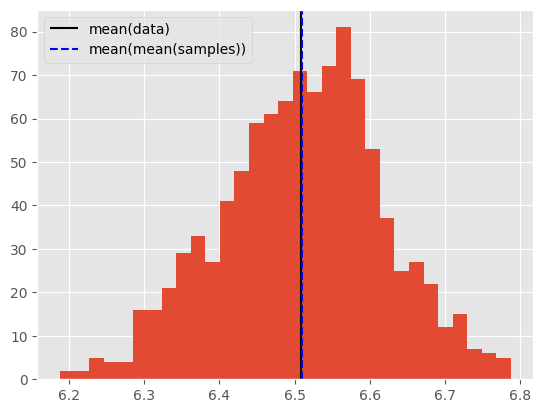

In [46]:
stats = validate_statistic(data, np.mean, verbose=True)

Оценка состоятельная


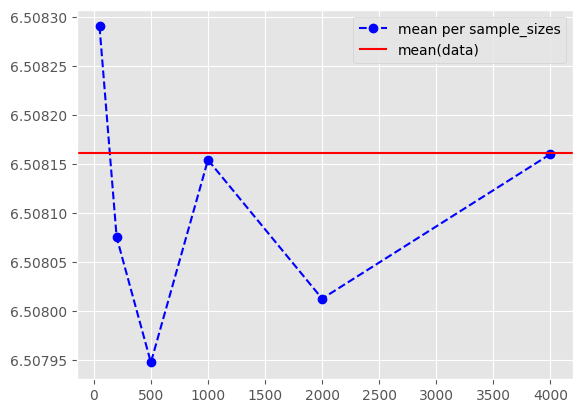

In [47]:
validate_with_sizes(
    data,
    np.mean,
    n_samples=100_000,
    sample_sizes=[50, 200, 500, 1000, 2000, 4000]
)

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов (3 балла все задание)
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

median(data) = 6.61
mean(median_samples) = 6.615369999999999
diff: 0.0053699999999983206 (0.08%)
Оценка является несмещённой.


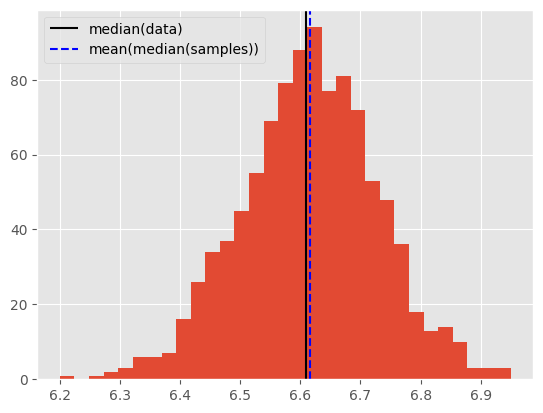

In [48]:
stats = validate_statistic(data, np.median, verbose=True)

Оценка состоятельная


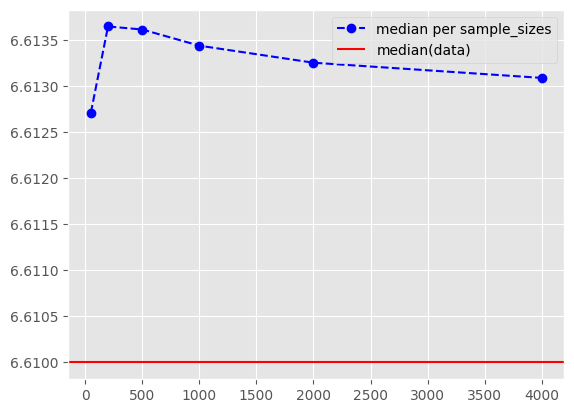

In [49]:
validate_with_sizes(
    data,
    np.median,
    n_samples=100_000,
    sample_sizes=[50, 200, 500, 1000, 2000, 4000]
)

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов (3 балла все задание)
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки. (1 балл)

std(data) = 1.057311226115653
mean(std_samples) = 1.0483707784771454
diff: 0.008940447638507543 (0.85%)
Оценка является несмещённой.


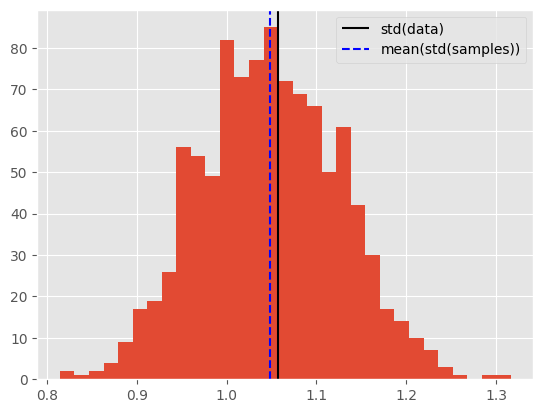

In [50]:
stats = validate_statistic(data, np.std, verbose=True)

Оценка состоятельная


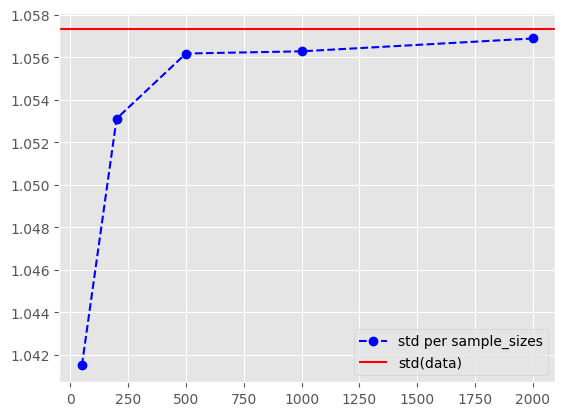

In [51]:
validate_with_sizes(
    data,
    np.std,
    n_samples=10_000,
    sample_sizes=[50, 200, 500, 1000, 2000]
)